# Вариант 2. Описательный анализ и визуализация данных.
Данный вариант предполагает фокусировку на исследовании данных и визуализации. При решении этого варианта следует провести как можно более подробный описательный анализ данных с использованием максимального спектра средств визуализации. При этом следует делать значимые выводы об обнаруженных в данных закономерностях.

In [ ]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, make_scorer, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [ ]:
dataset = pd.read_csv('german_credit_data.csv')
dataset

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
dataset.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [ ]:
dataset.describe(include='O')

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,817,606,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,603,274,337,700


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


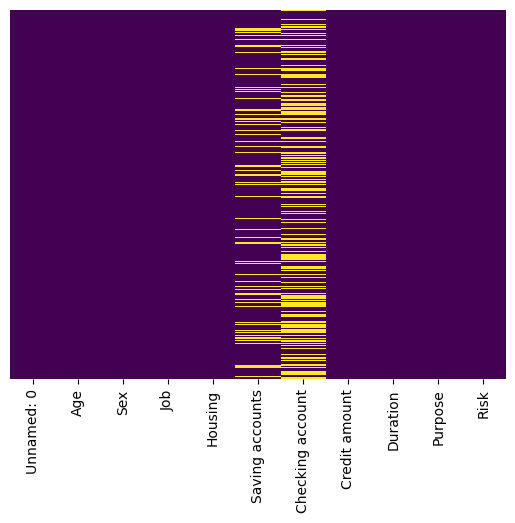

In [ ]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [ ]:
for col in dataset.columns:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

In [ ]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)

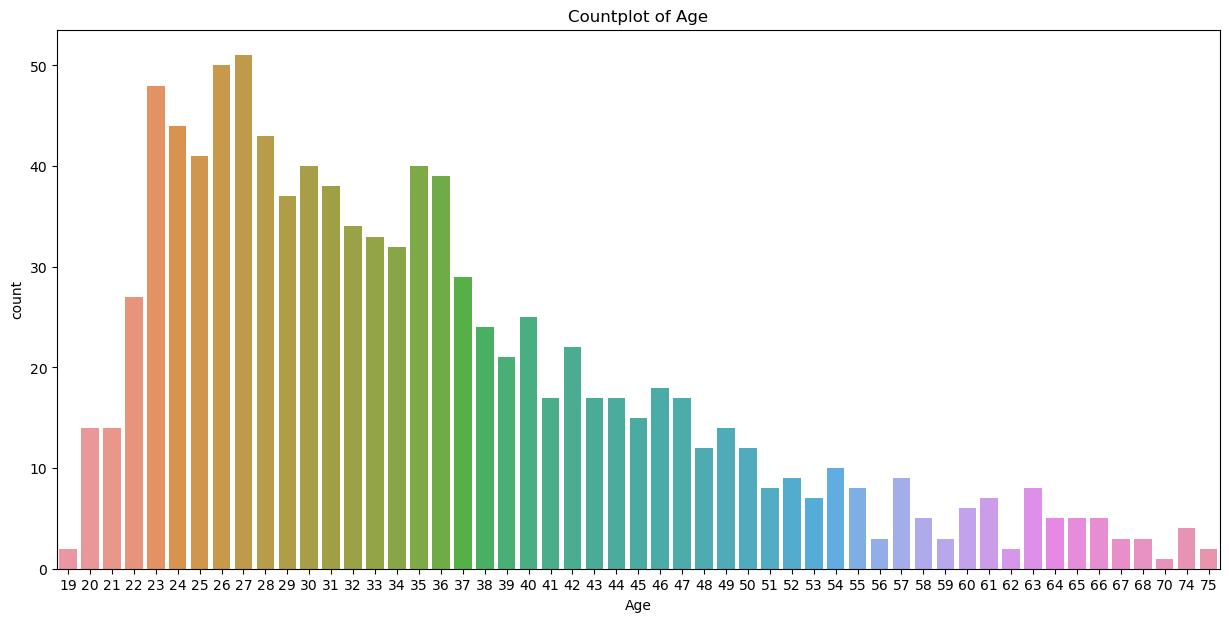

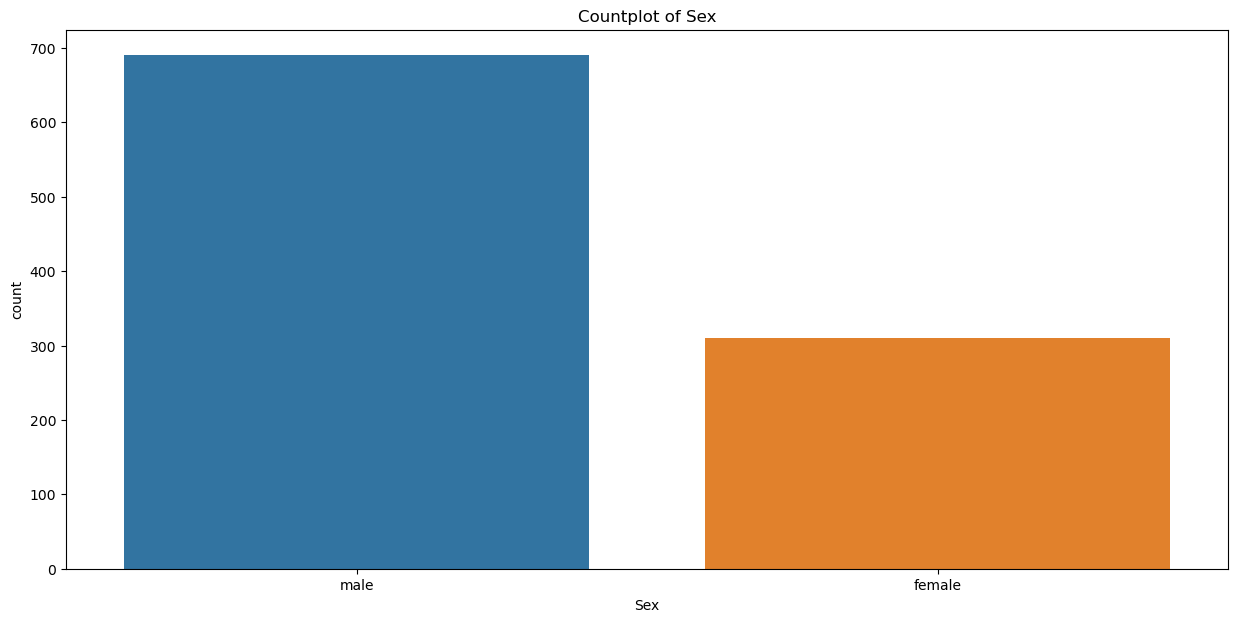

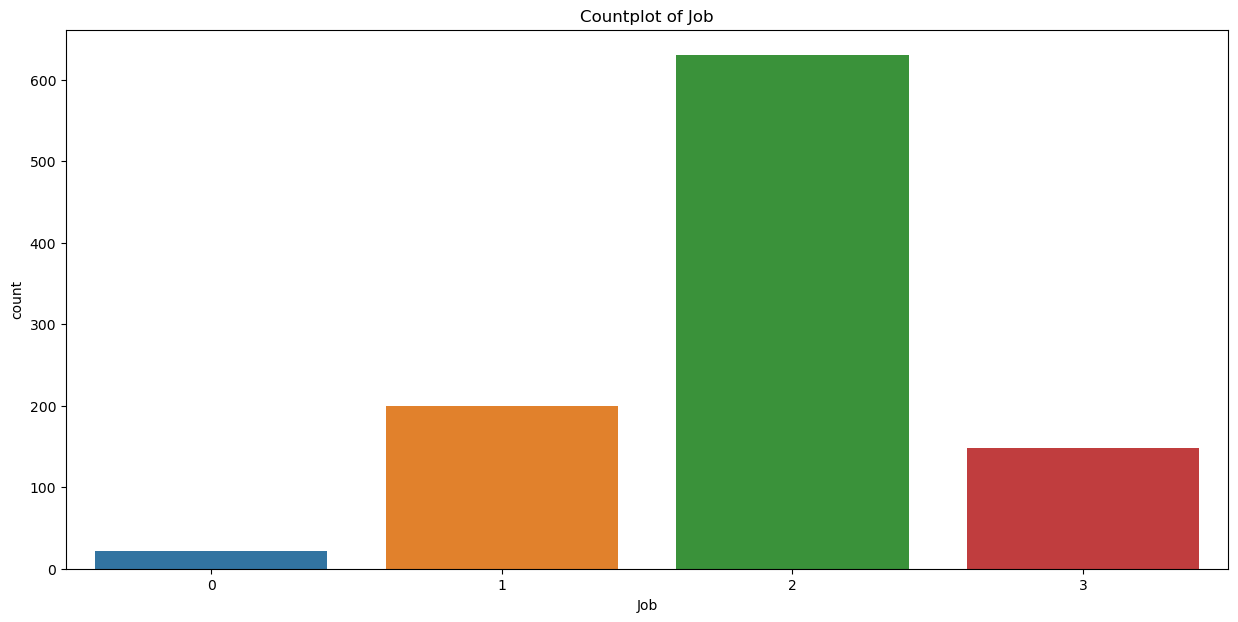

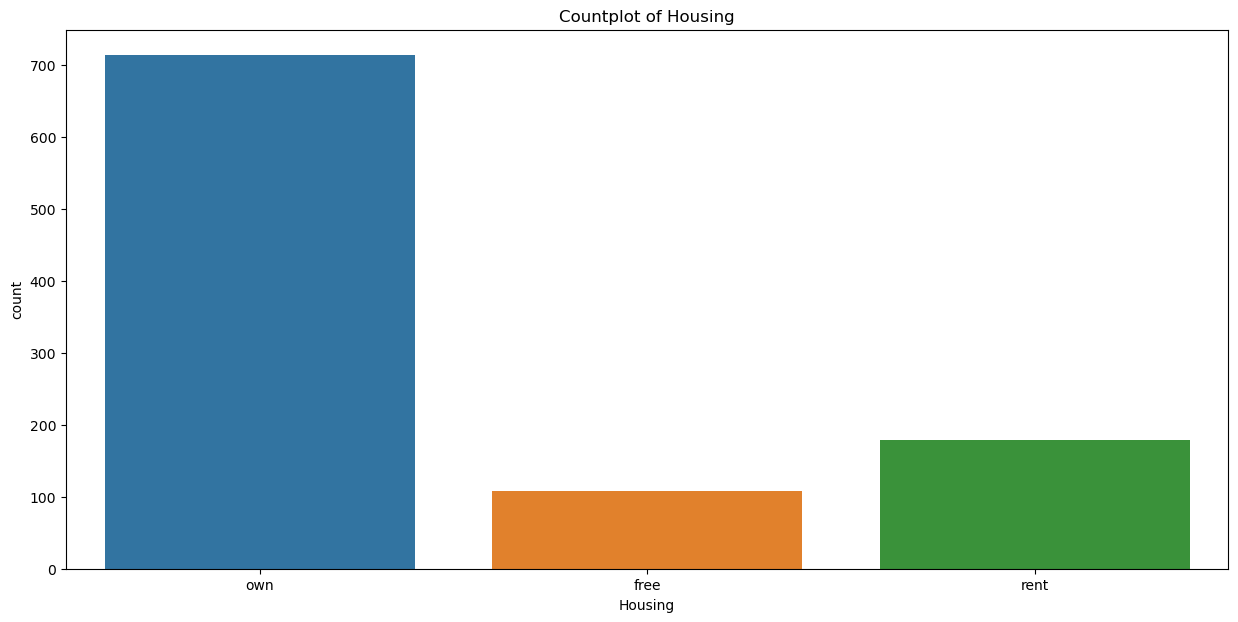

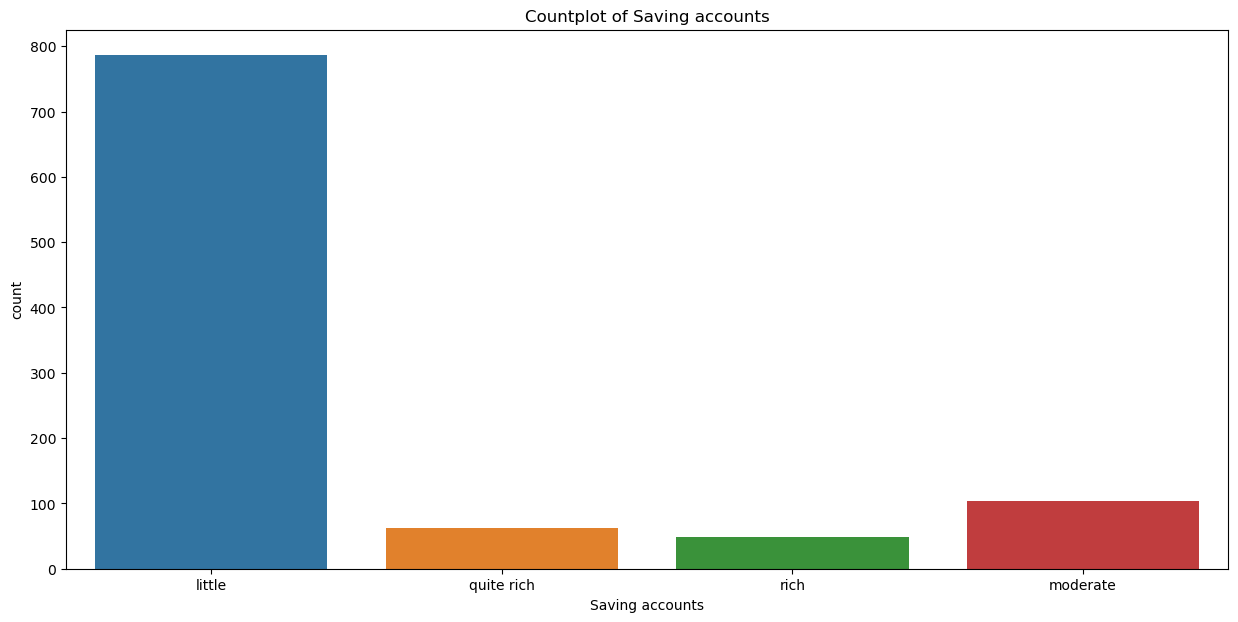

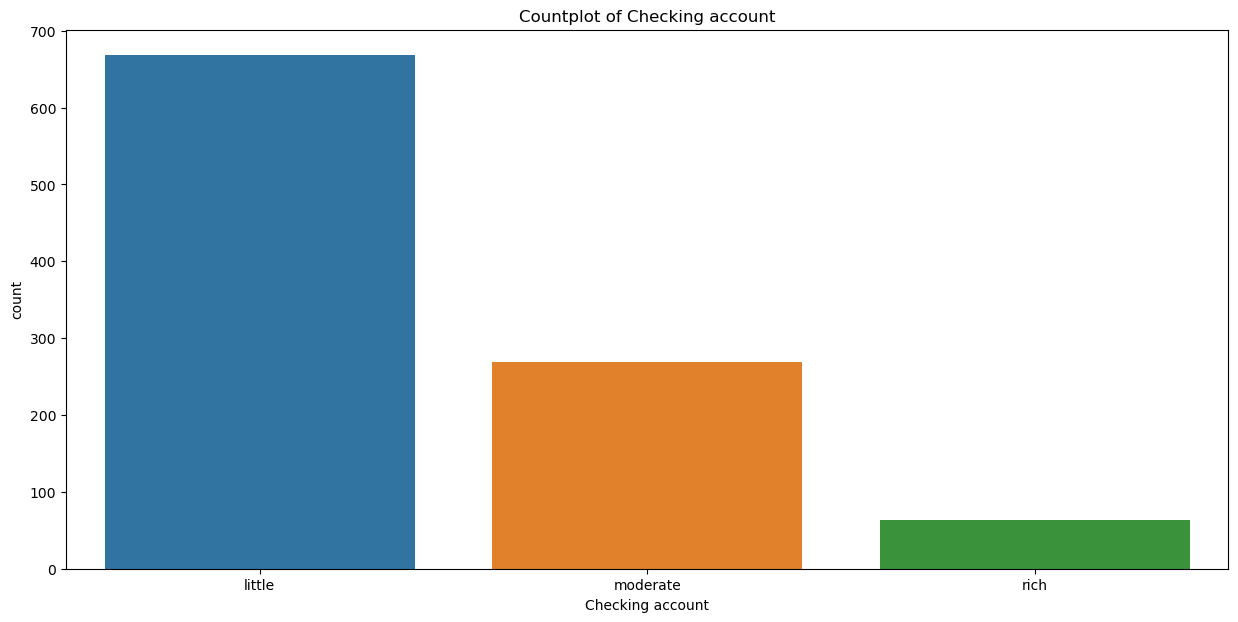

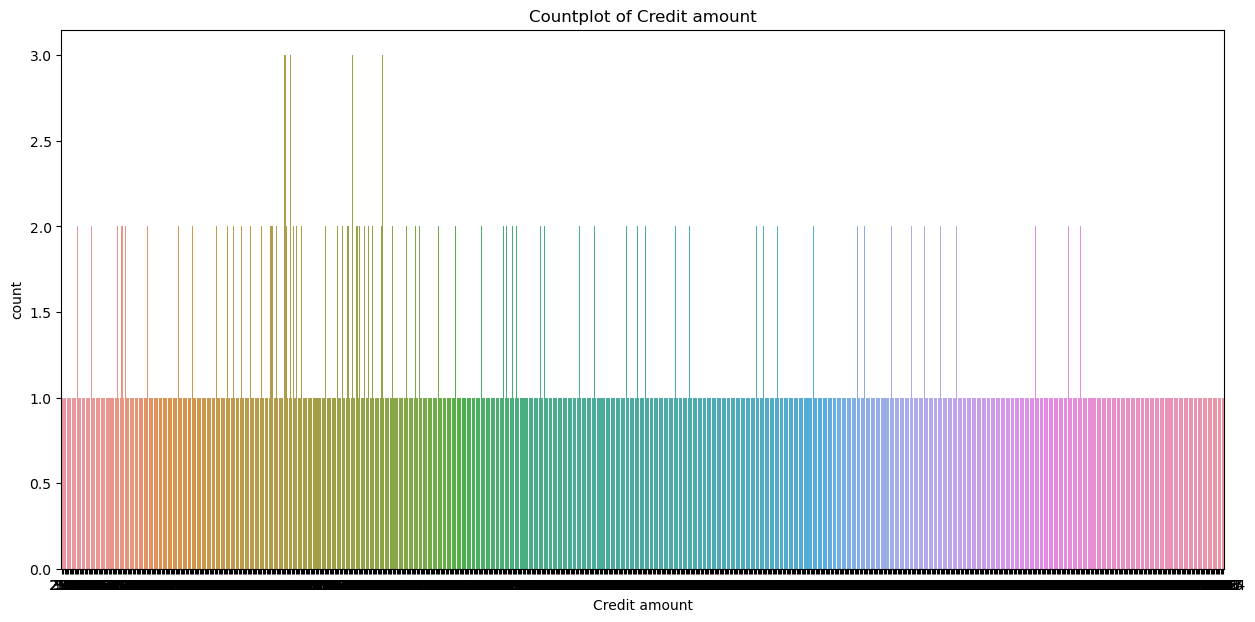

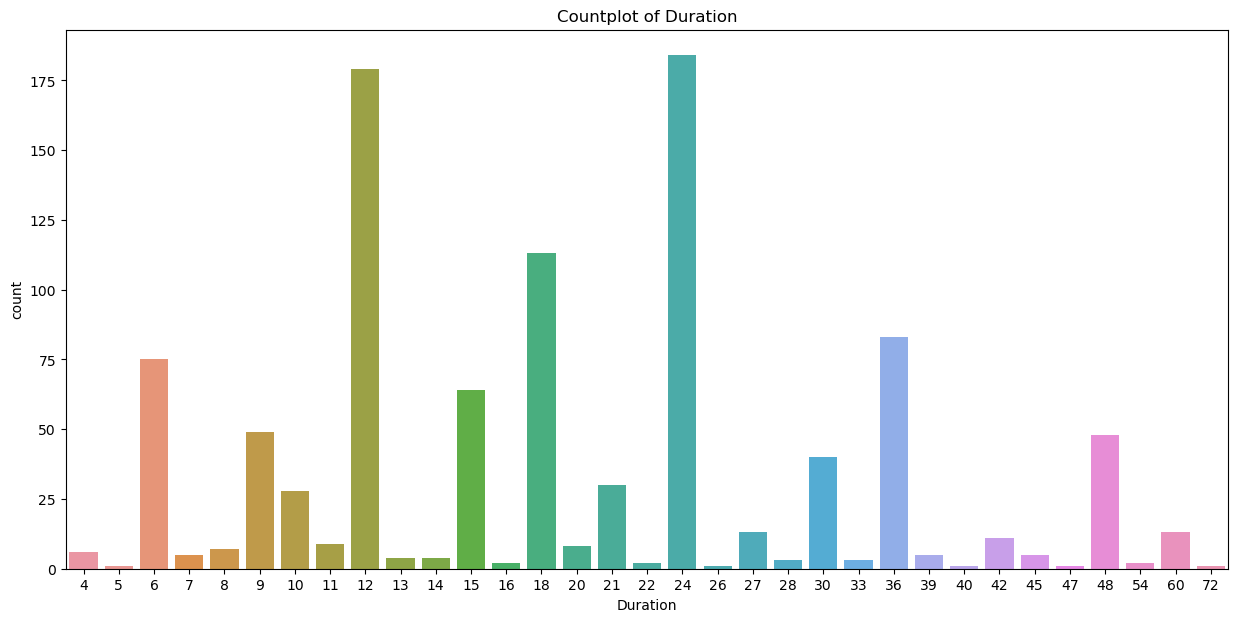

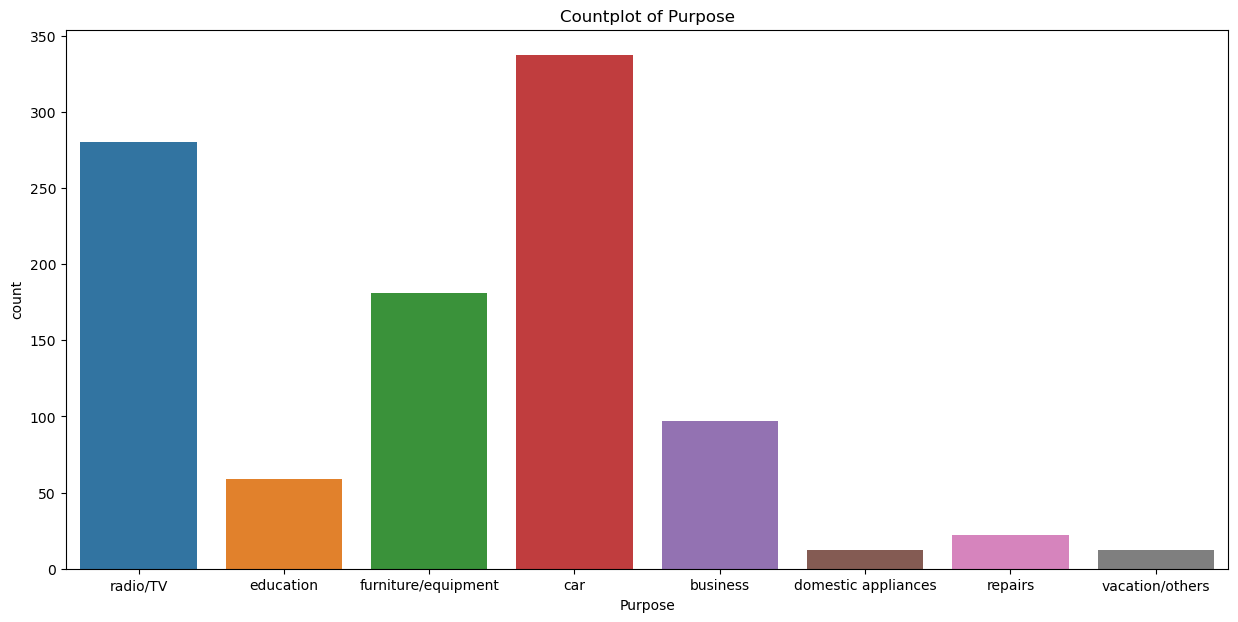

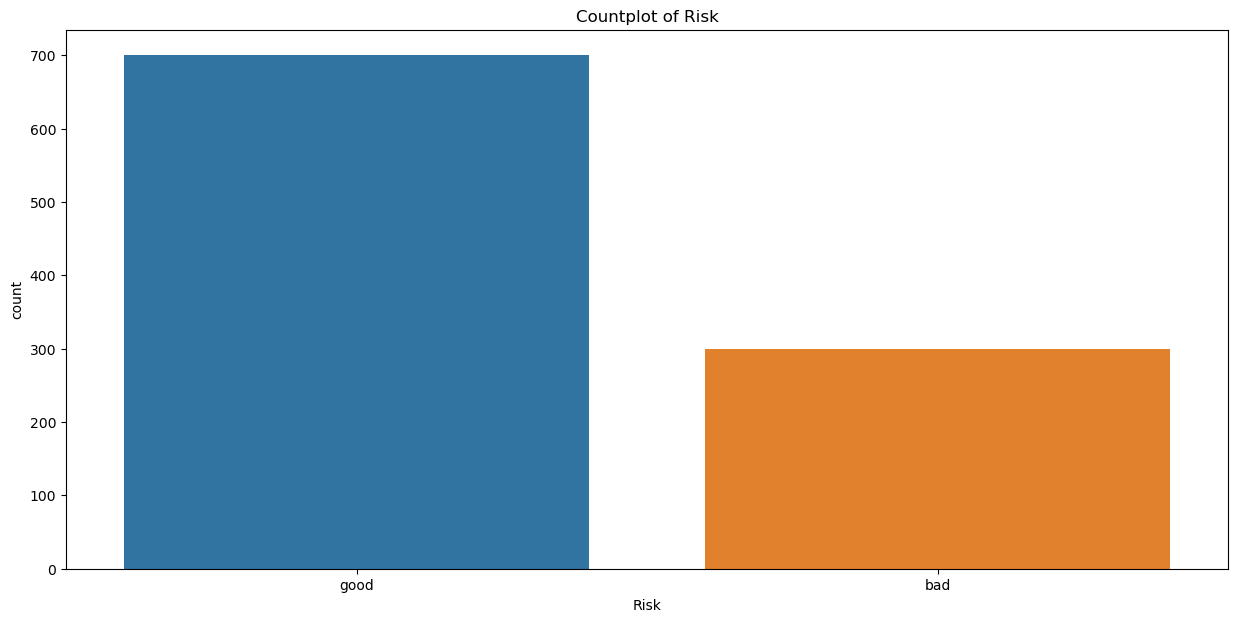

In [ ]:
def plot_countplots(data, target_column):
    for column in data.columns:
        plt.figure(figsize=(15, 7))
        sns.countplot(x=data[column], data=data)
        plt.title(f'Countplot of {column}')
        plt.show()
plot_countplots(dataset, 'Risk')

In [ ]:
dataset.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good


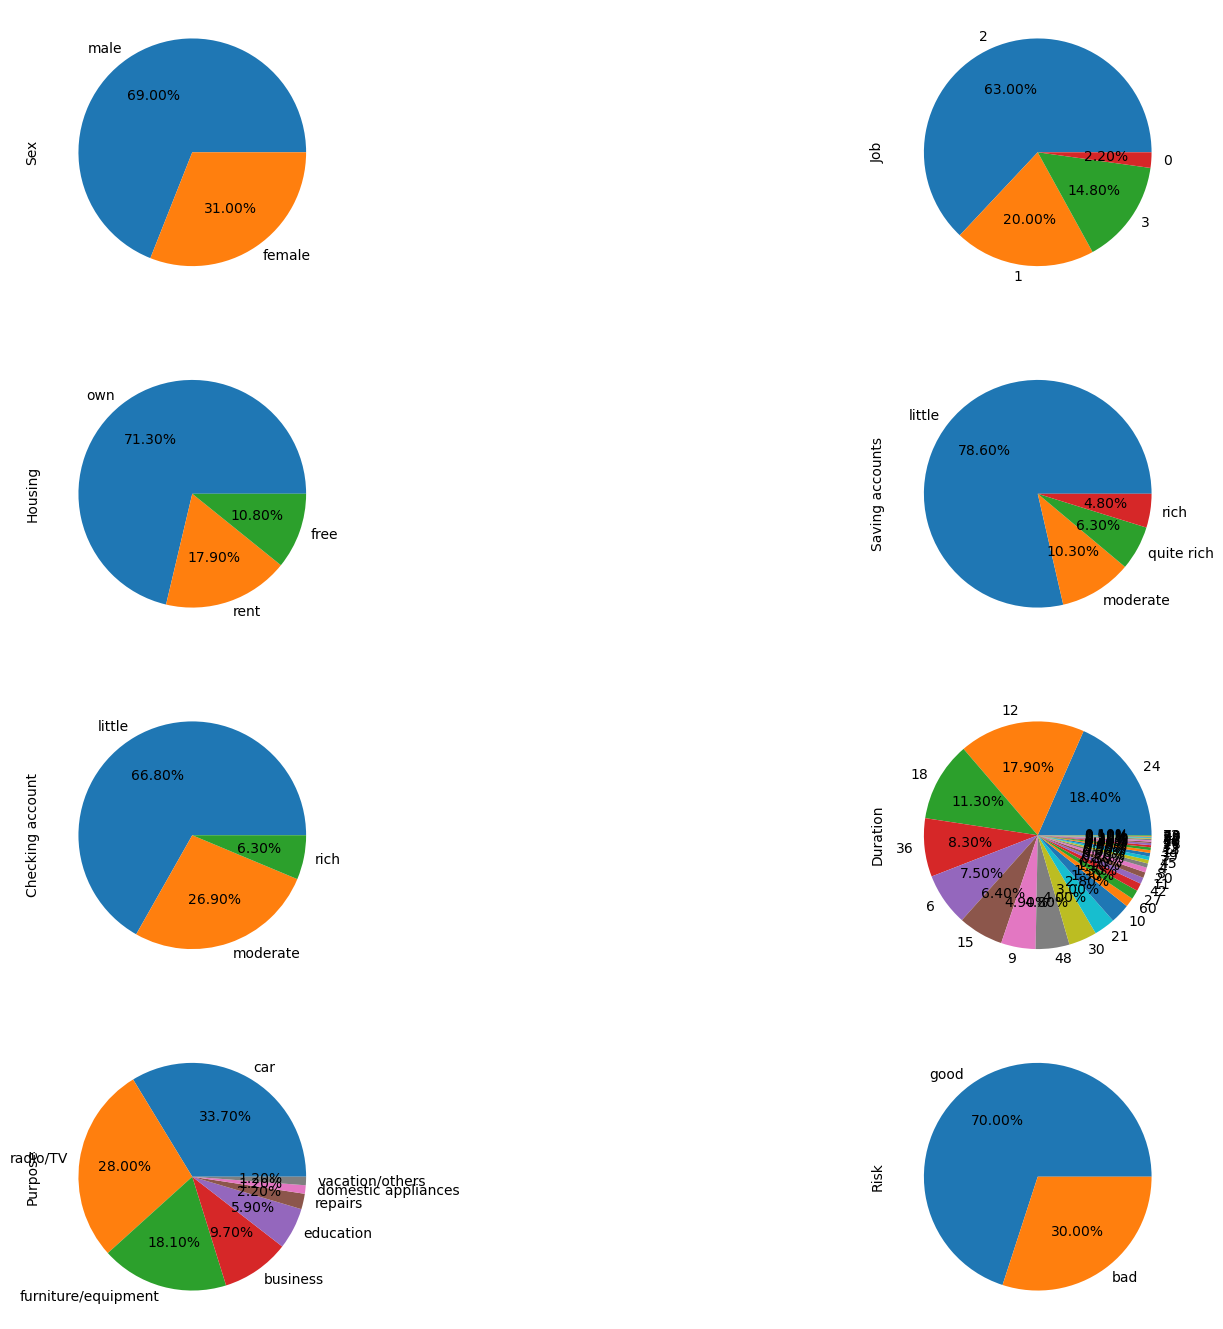

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(20, 17))
dataset['Sex'].value_counts().plot(kind='pie',autopct='%.2f%%', ax = axs[0,0])
dataset['Job'].value_counts().plot(kind='pie',autopct='%.2f%%', ax = axs[0,1])
dataset['Housing'].value_counts().plot(kind='pie',autopct='%.2f%%', ax = axs[1,0])
dataset['Saving accounts'].value_counts().plot(kind='pie',autopct='%.2f%%', ax = axs[1,1])
dataset['Checking account'].value_counts().plot(kind='pie',autopct='%.2f%%', ax = axs[2,0]);
dataset['Duration'].value_counts().plot(kind='pie',autopct='%.2f%%', ax = axs[2,1]);
dataset['Purpose'].value_counts().plot(kind='pie',autopct='%.2f%%', ax = axs[3,0])
dataset['Risk'].value_counts().plot(kind='pie',autopct='%.2f%%', ax = axs[3,1]);

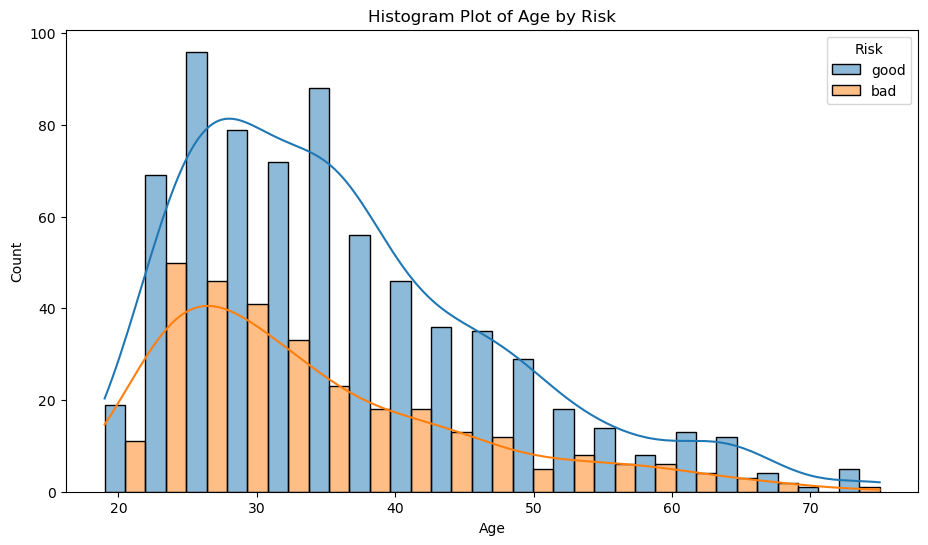

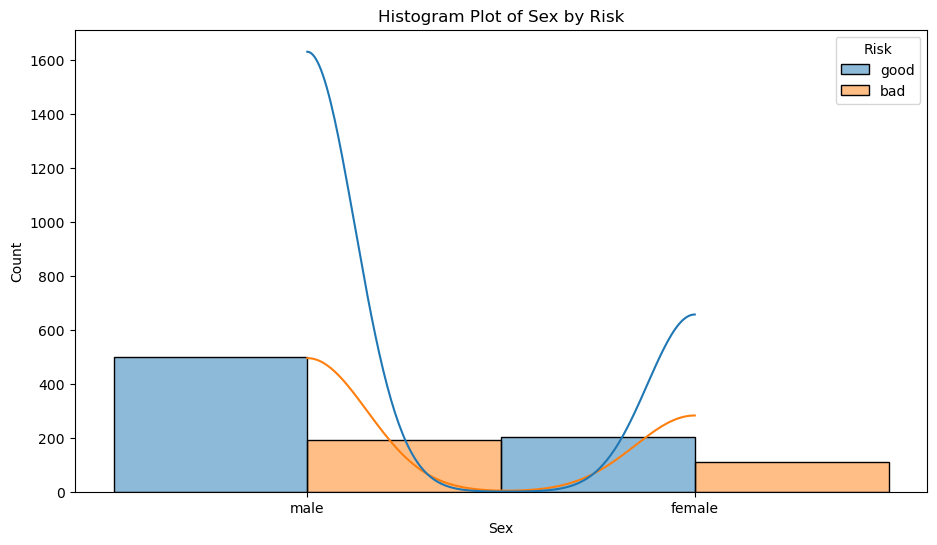

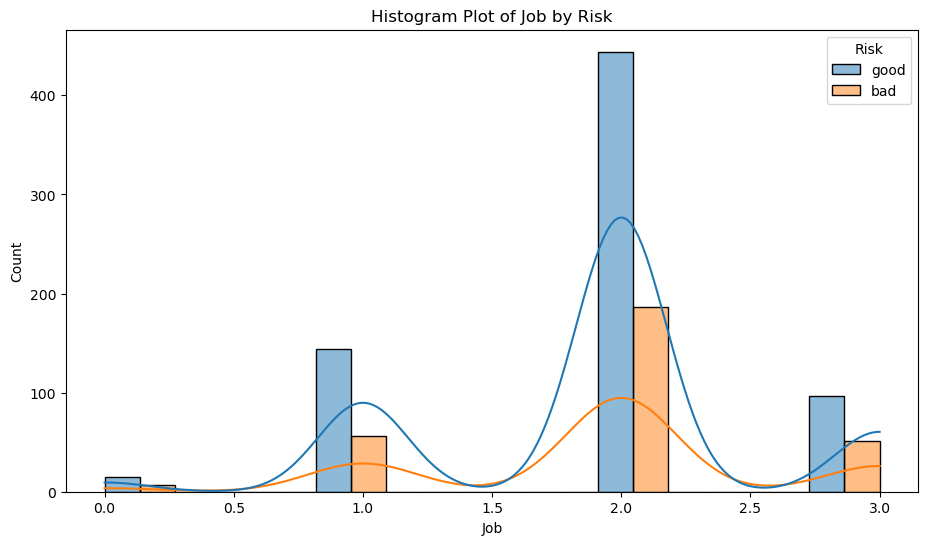

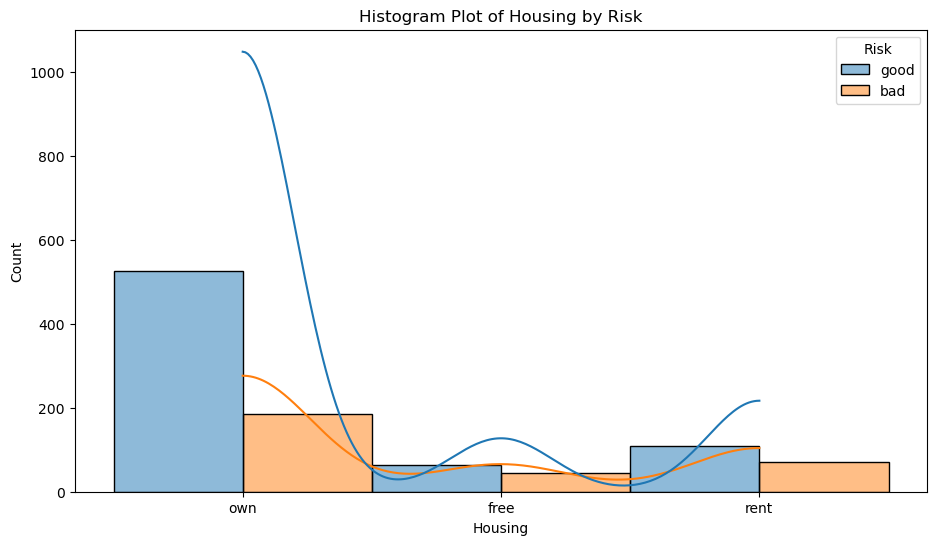

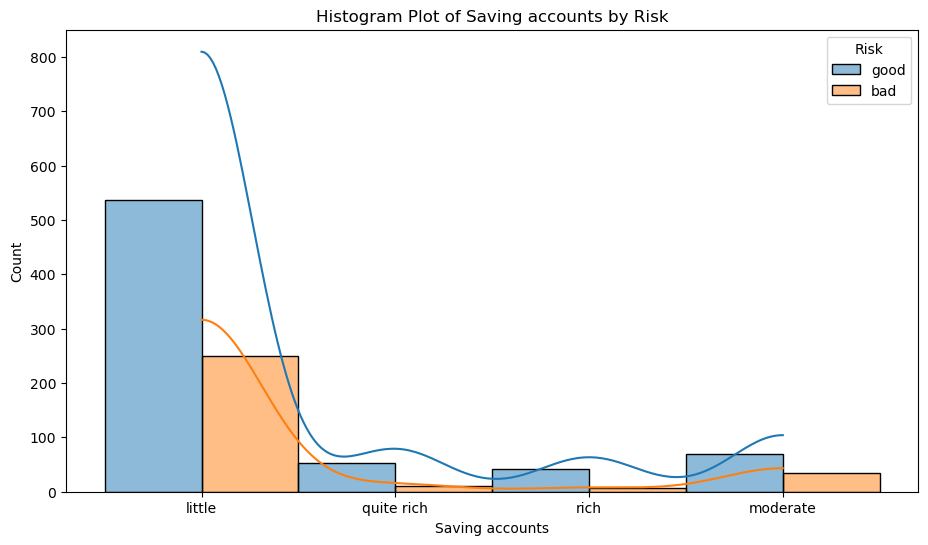

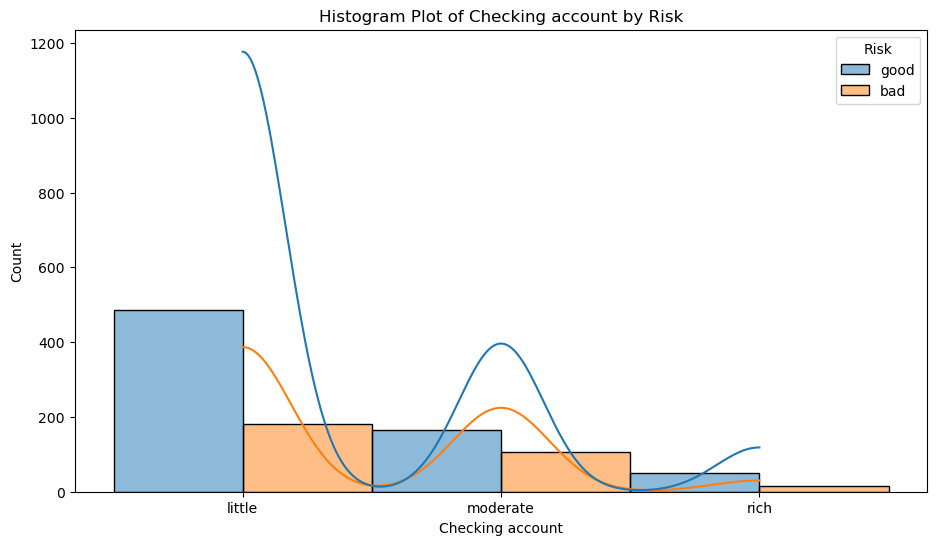

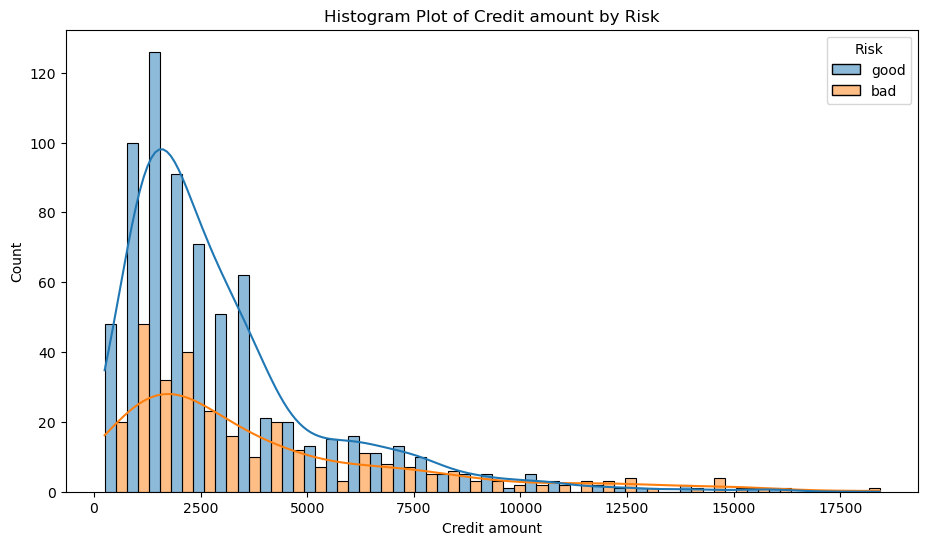

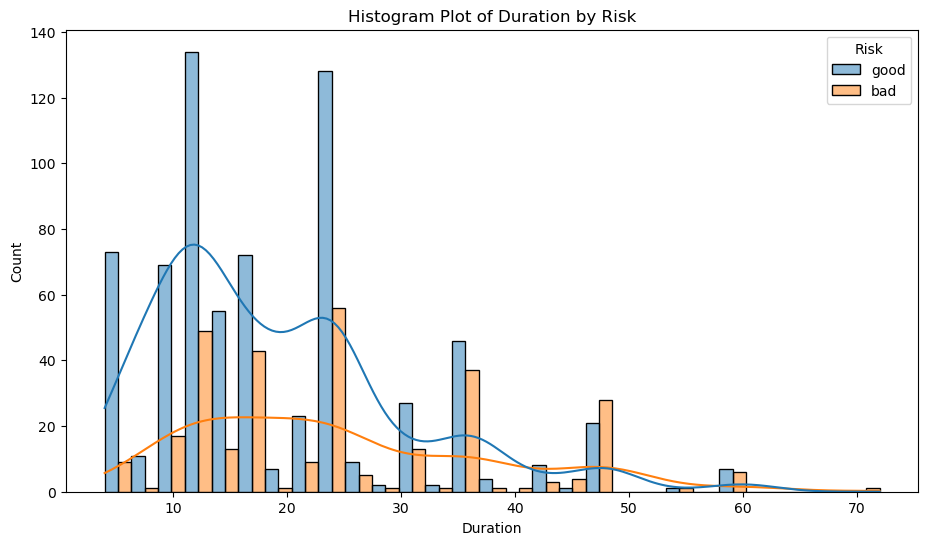

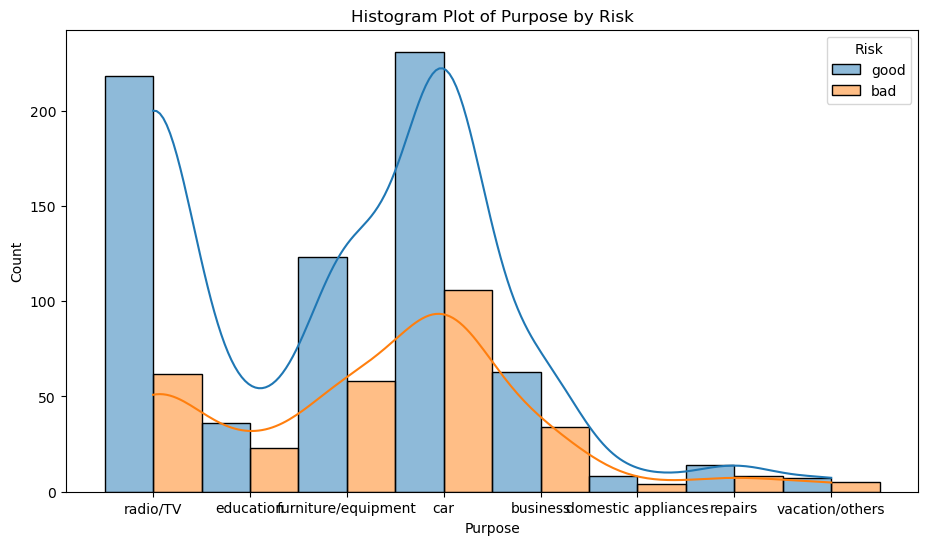

In [ ]:
def plot_histplot_target(df, target_column):
    for column in df.columns:
        if column != target_column:
            plt.figure(figsize=(11, 6))
            sns.histplot(data=df, x=column, hue=target_column, kde=True, multiple='dodge')
            plt.title(f'Histogram Plot of {column} by {target_column}')
            plt.show()
plot_histplot_target(dataset, 'Risk')

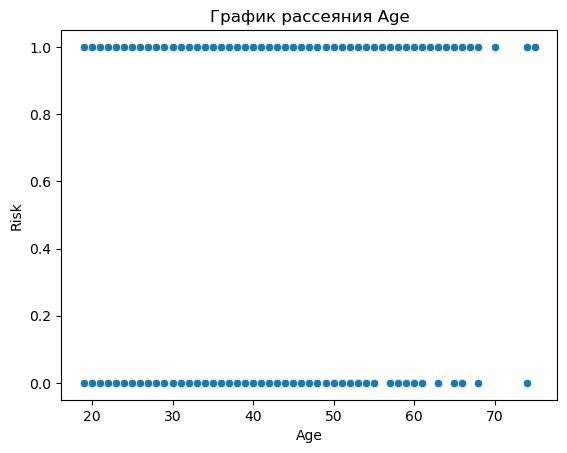

<Figure size 1100x600 with 0 Axes>

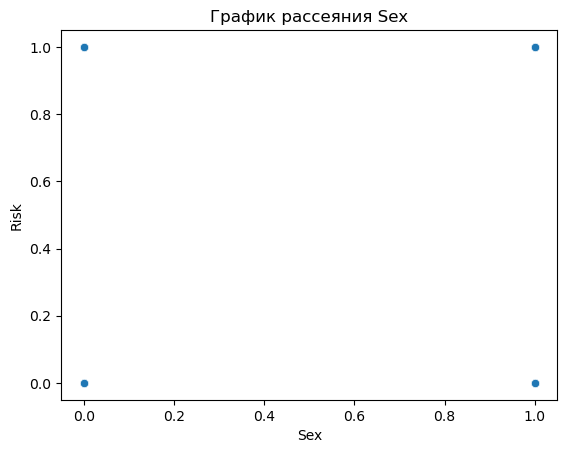

<Figure size 1100x600 with 0 Axes>

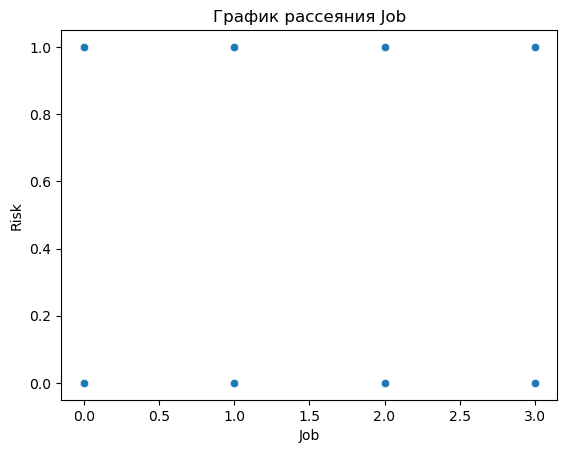

<Figure size 1100x600 with 0 Axes>

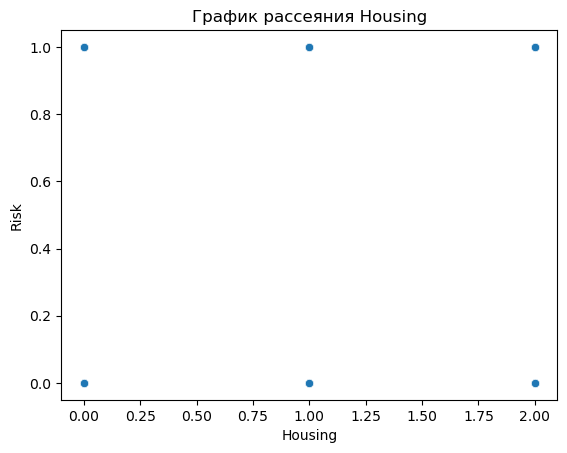

<Figure size 1100x600 with 0 Axes>

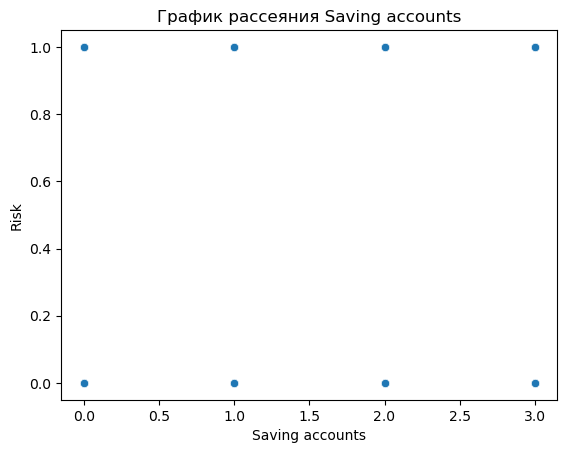

<Figure size 1100x600 with 0 Axes>

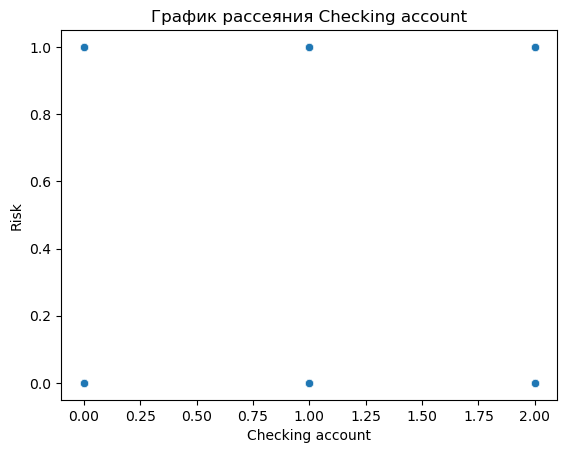

<Figure size 1100x600 with 0 Axes>

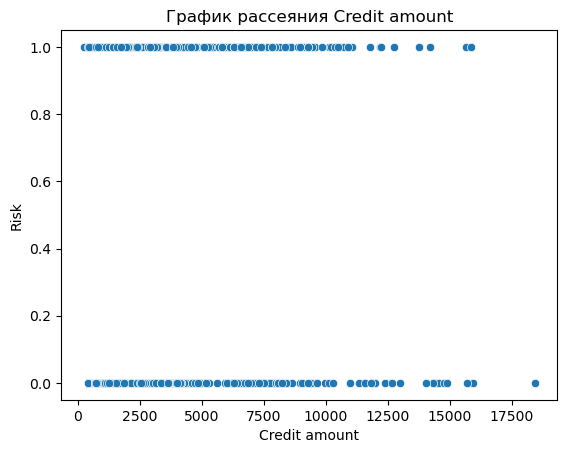

<Figure size 1100x600 with 0 Axes>

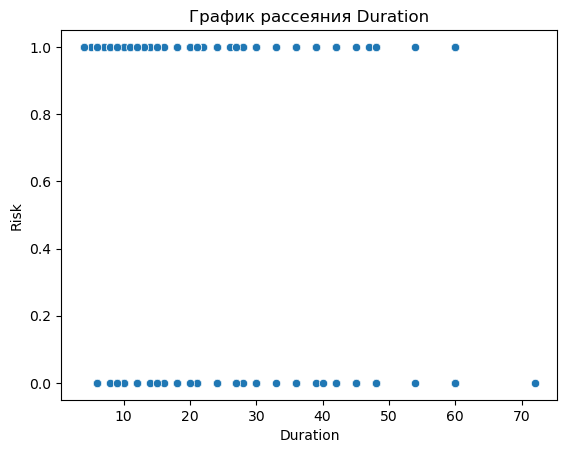

<Figure size 1100x600 with 0 Axes>

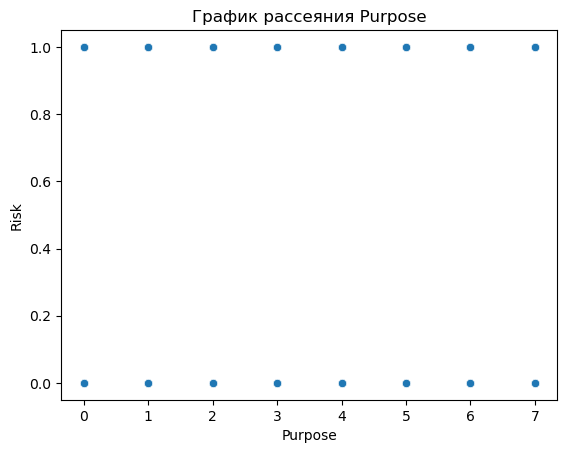

<Figure size 1100x600 with 0 Axes>

In [ ]:
def plot_scatter(df, target_column):
    for i in df.columns:
        if i != target_column:
            fig, ax = plt.subplots()
            plt.figure(figsize=(11, 6));
            sns.scatterplot(data=df, x=i, y=target_column, ax=ax);
            ax.set_title(f'График рассеяния {i}')
            plt.show()
plot_scatter(dataset, 'Risk')

In [ ]:
label_encoder = LabelEncoder()
dataset['Sex'] = label_encoder.fit_transform(dataset['Sex'])
dataset['Housing'] = label_encoder.fit_transform(dataset['Housing'])
dataset['Saving accounts'] = label_encoder.fit_transform(dataset['Saving accounts'])
dataset['Checking account'] = label_encoder.fit_transform(dataset['Checking account'])
dataset['Purpose'] = label_encoder.fit_transform(dataset['Purpose'])
dataset['Risk'] = label_encoder.fit_transform(dataset['Risk'])
dataset

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4,1
996,40,1,3,1,0,0,3857,30,1,1
997,38,1,2,1,0,0,804,12,5,1
998,23,1,2,0,0,0,1845,45,5,0


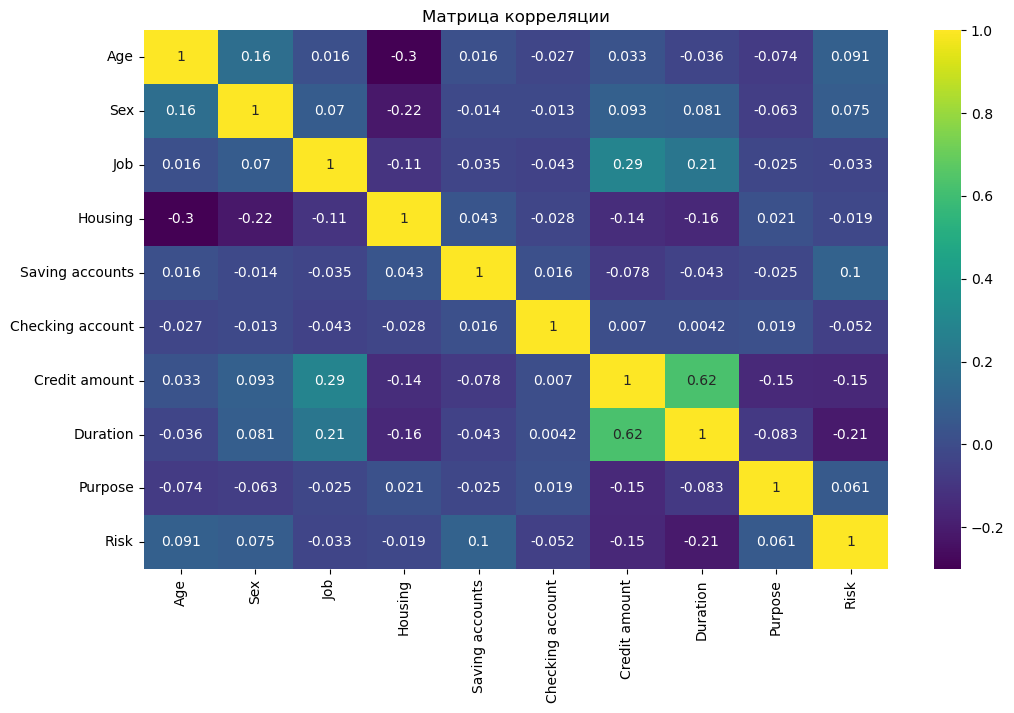

In [ ]:
correlation_matrix = dataset.corr()

plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Матрица корреляции')
plt.show()

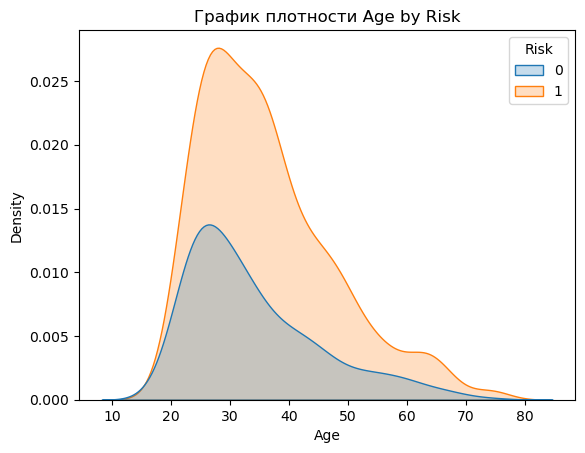

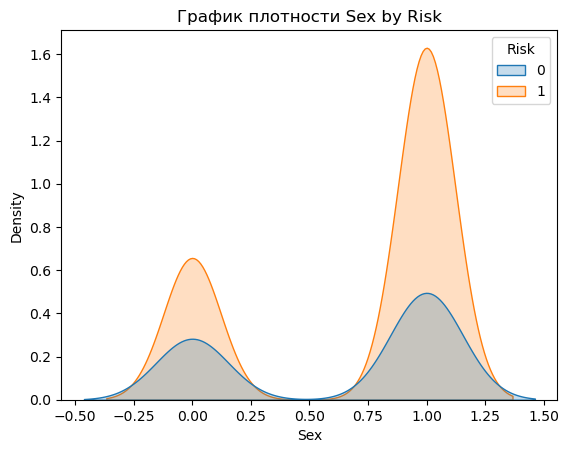

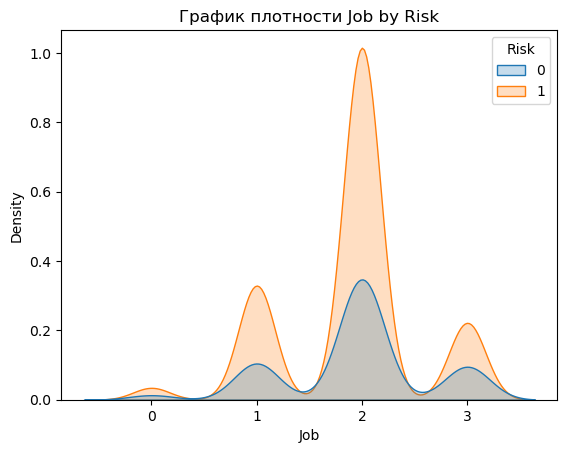

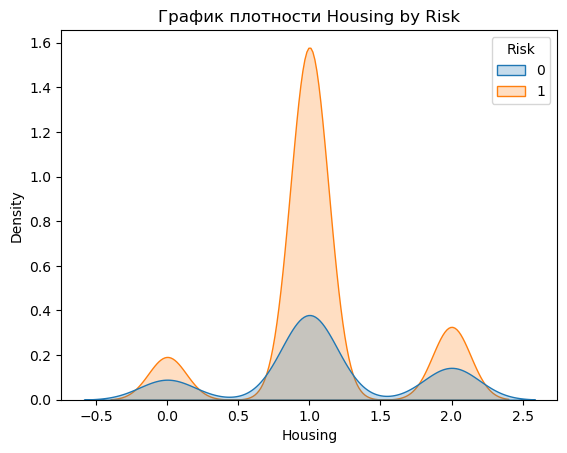

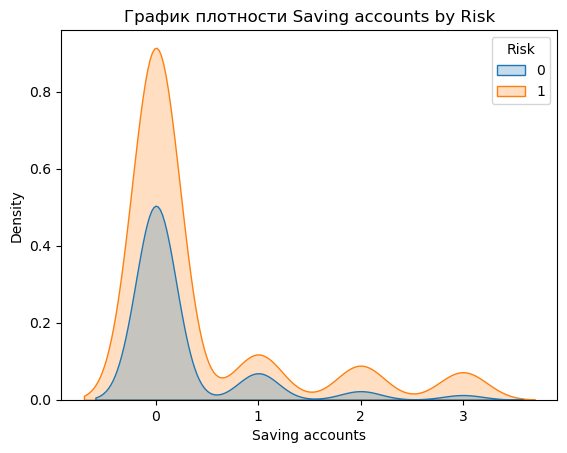

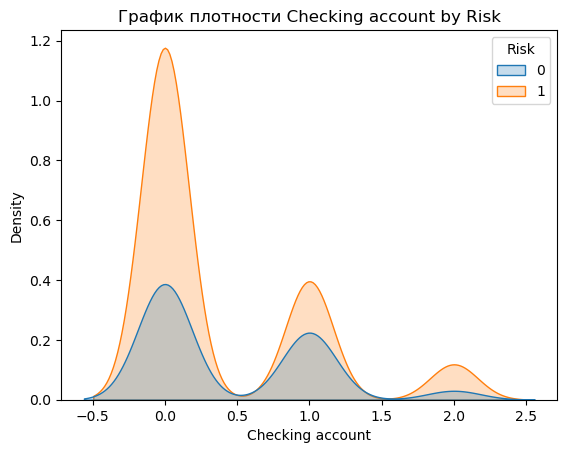

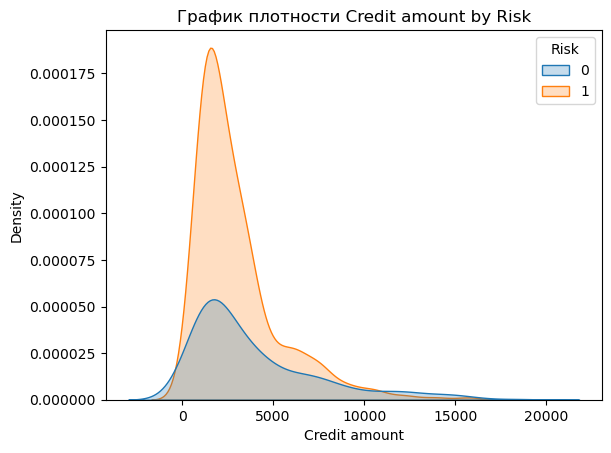

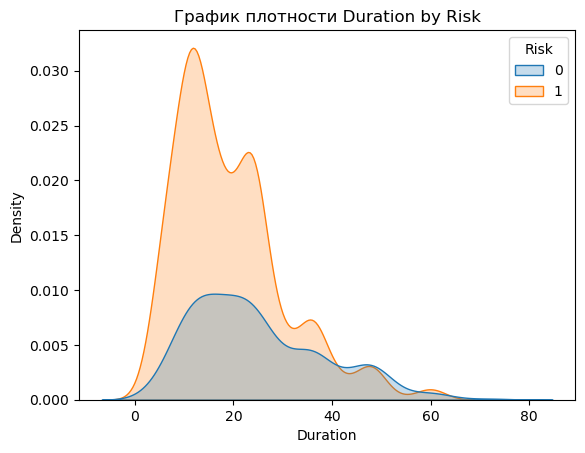

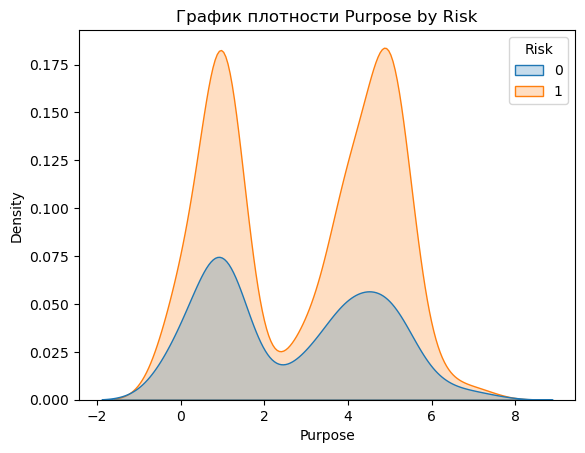

In [ ]:
def plot_density(df, target_column):
    for column in df.columns:
        if column != target_column:
            fig, ax = plt.subplots()
            sns.kdeplot(data=df, x=column, hue=target_column, fill=True, ax=ax)
            ax.set_title(f'График плотности {column} by {target_column}')
            plt.show()
plot_density(dataset, 'Risk')

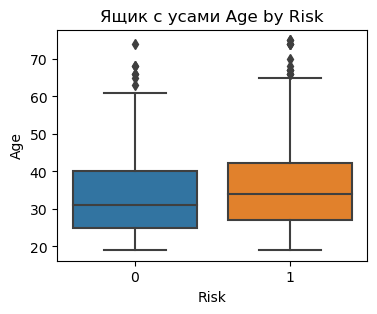

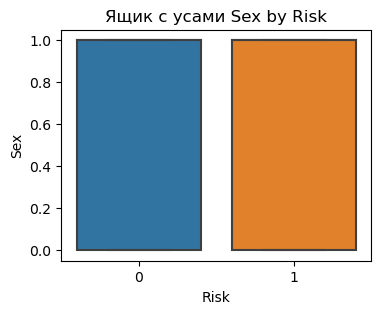

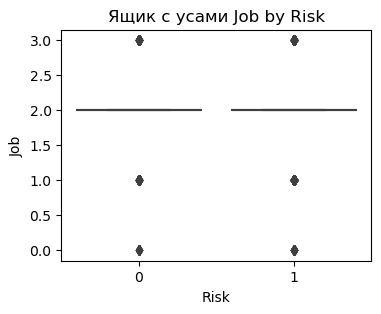

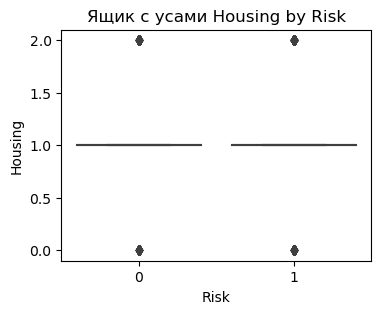

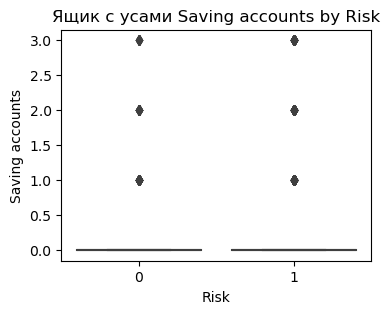

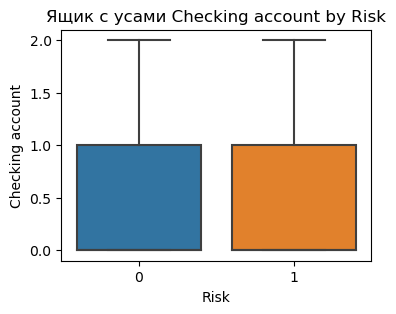

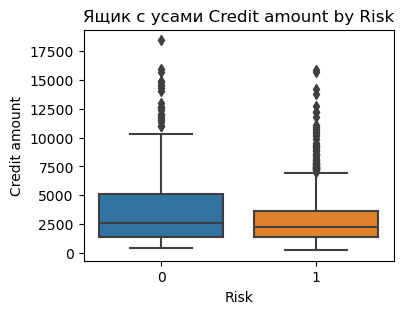

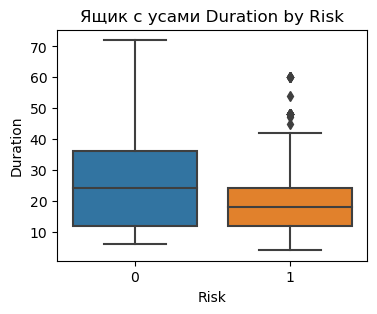

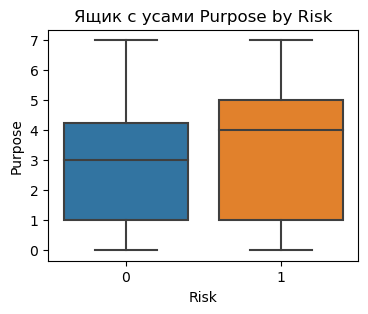

In [ ]:
def plot_boxplot_target(df, target_column):
    for column in df.columns:
        if column != target_column:
            plt.figure(figsize=(4, 3))
            sns.boxplot(data=df, x=target_column, y=column)
            plt.title(f'Ящик с усами {column} by {target_column}')
            plt.show()
plot_boxplot_target(dataset, 'Risk')

In [ ]:
X = dataset.drop('Risk', axis=1)
y = dataset['Risk']
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1
...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4
996,40,1,3,1,0,0,3857,30,1
997,38,1,2,1,0,0,804,12,5
998,23,1,2,0,0,0,1845,45,5


In [ ]:
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int32

In [ ]:
def train_run_models(X, y):
    metrics = {
        'Accuracy': make_scorer(accuracy_score),
        'Precision': make_scorer(precision_score, average='weighted'),
        'Recall': make_scorer(recall_score, average='weighted'),
        'F1-Score': make_scorer(f1_score, average='weighted'),
        'ROC-AUC': make_scorer(roc_auc_score)
    }

    models = [
        ('Логистическая регрессия', LogisticRegression()),
    ]

    acc_dict = {}
    for name, model in models:
        model_scores = {}
        for metric_name, scorer in metrics.items():
            cv_results = cross_val_score(model, X, y, cv=5, scoring=scorer, n_jobs=-1)
            model_scores[metric_name] = cv_results.mean()

        acc_dict[name] = model_scores

    acc_df = pd.DataFrame.from_dict(acc_dict, orient='index')
    display(acc_df)

train_run_models(X, y)

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Логистическая регрессия,0.718,0.70283,0.718,0.653977,0.558571
